In [20]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
# === Setup ===
# Might need to change to main directory of MolFeatures
ROOT_DIR = Path().resolve().parent
print(f"Setting ROOT_DIR to: {ROOT_DIR}")
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))
os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:

    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution, add_output_column_csv
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")

# === Config ===
pd.set_option('display.max_columns', None)
examples_path=ROOT_DIR / 'Getting_started_with_examples'
os.chdir(examples_path)
    

Setting ROOT_DIR to: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In the next part, an example file from directory modeling_example is used, but you can pick any csv, just specify the correct path.

**Note that you need to have an output column values in order to create a model, either add manually, or in target_csv_filepath enter the location of the output csv**

Reusing existing run directory: runs\Linear_Dataset_Example_output_linear_20250917
Database already exists at: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\runs\Linear_Dataset_Example_output_linear_20250917\db\results_Linear_Dataset_Example.db
Table 'regression_results' has been ensured to exist.
linear model selected
Loaded CSV: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\modeling_example\Linear_Dataset_Example.csv
Names column: Unnamed: 0  |  Target column: output
Rows: 15
Features (total â kept numeric): 22 â 22


interactive(children=(FloatSlider(value=0.9, continuous_update=False, description='|r| ≥', max=1.0, step=0.01)…

--- Correlation Report ---
Features with |r| > 0.8:
['-1-2-', '-2-9-']
VIF pruning skipped by user/preference.

----- Independence of Errors (Durbin-Watson) -----
Durbin-Watson statistic: 0.829
â ï¸ Possible autocorrelation in residuals.

----- Homoscedasticity (Breusch-Pagan Test) -----
Breusch-Pagan p-value: 0.862
â Homoscedasticity assumed (good).

----- Normality of Errors (Shapiro-Wilk Test) -----
Shapiro-Wilk p-value: 0.364
â Residuals appear normally distributed.

----- Normality of Errors (Q-Q Plot) -----


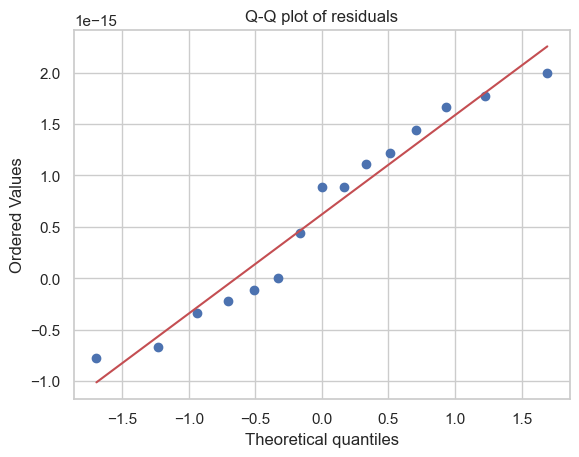

In [21]:

modeling_example_dir = examples_path / 'modeling_example'
csv_path = modeling_example_dir / 'Linear_Dataset_Example.csv'
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', y_value='output',
                                        leave_out=None, min_features_num=2,
                                        max_features_num=2, metrics=None, return_coefficients=False)


Using 1 jobs for evaluation. Found 20 cores.
Loaded 465 existing results from DB.
Combos to run: 0, done_combos: 232
No new combinations to evaluate at threshold 0.900.


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M3_modeler\plot.py:1964: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



[PDF] Skipping top-5 export due to error: local variable 'feature' referenced before assignment
| formula                    |     R.sq |     Q.sq |       MAE |   Model_id |
|:---------------------------|---------:|---------:|----------:|-----------:|
| ('Dist_1-2', 'Dist_16-17') | 0.6319   | 0.496322 | 0.0953842 |          0 |
| ('-17-18-', 'Dist_16-17')  | 0.562576 | 0.416891 | 0.11597   |          1 |
| ('-2-3-', 'Dist_16-17')    | 0.552127 | 0.393304 | 0.122832  |          2 |
| ('para', 'Dist_16-17')     | 0.626874 | 0.391091 | 0.134835  |          3 |
| ('Dist_2-3', 'Dist_16-17') | 0.56164  | 0.390795 | 0.121961  |          4 |

Model Coefficients

|             |   Estimate |   Std. Error |   t value |     p value |
|:------------|-----------:|-------------:|----------:|------------:|
| (Intercept) |  0.760256  |    0.0345025 |   22.0348 | 4.48761e-11 |
| Dist_1-2    | -0.0726808 |    0.0448371 |   -1.621  | 0.130981    |
| Dist_16-17  |  0.0998523 |    0.0448371 |    2.227  | 0

,id,combination,r2,q2,mae,rmsd,threshold,model,predictions
399,400,"('Dist_1-2', 'Dist_16-17')",0.631900,0.496322,0.095384,0.139809,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.74261605 0.85368758 0.8258459 0.76621532 0...
363,364,"('-17-18-', 'Dist_16-17')",0.562576,0.416891,0.115970,0.150430,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.78930226 0.85895124 0.89338957 0.78690881 0...
301,302,"('-2-3-', 'Dist_16-17')",0.552127,0.393304,0.122832,0.153442,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.78016569 0.85177465 0.88397326 0.77743871 0...
264,265,"('para', 'Dist_16-17')",0.626874,0.391091,0.134835,0.153722,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.74283809 0.84772915 0.87449755 0.9088889 0...
409,410,"('Dist_2-3', 'Dist_16-17')",0.561640,0.390795,0.121961,0.153759,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.77244496 0.85615089 0.87143718 0.76664967 0...


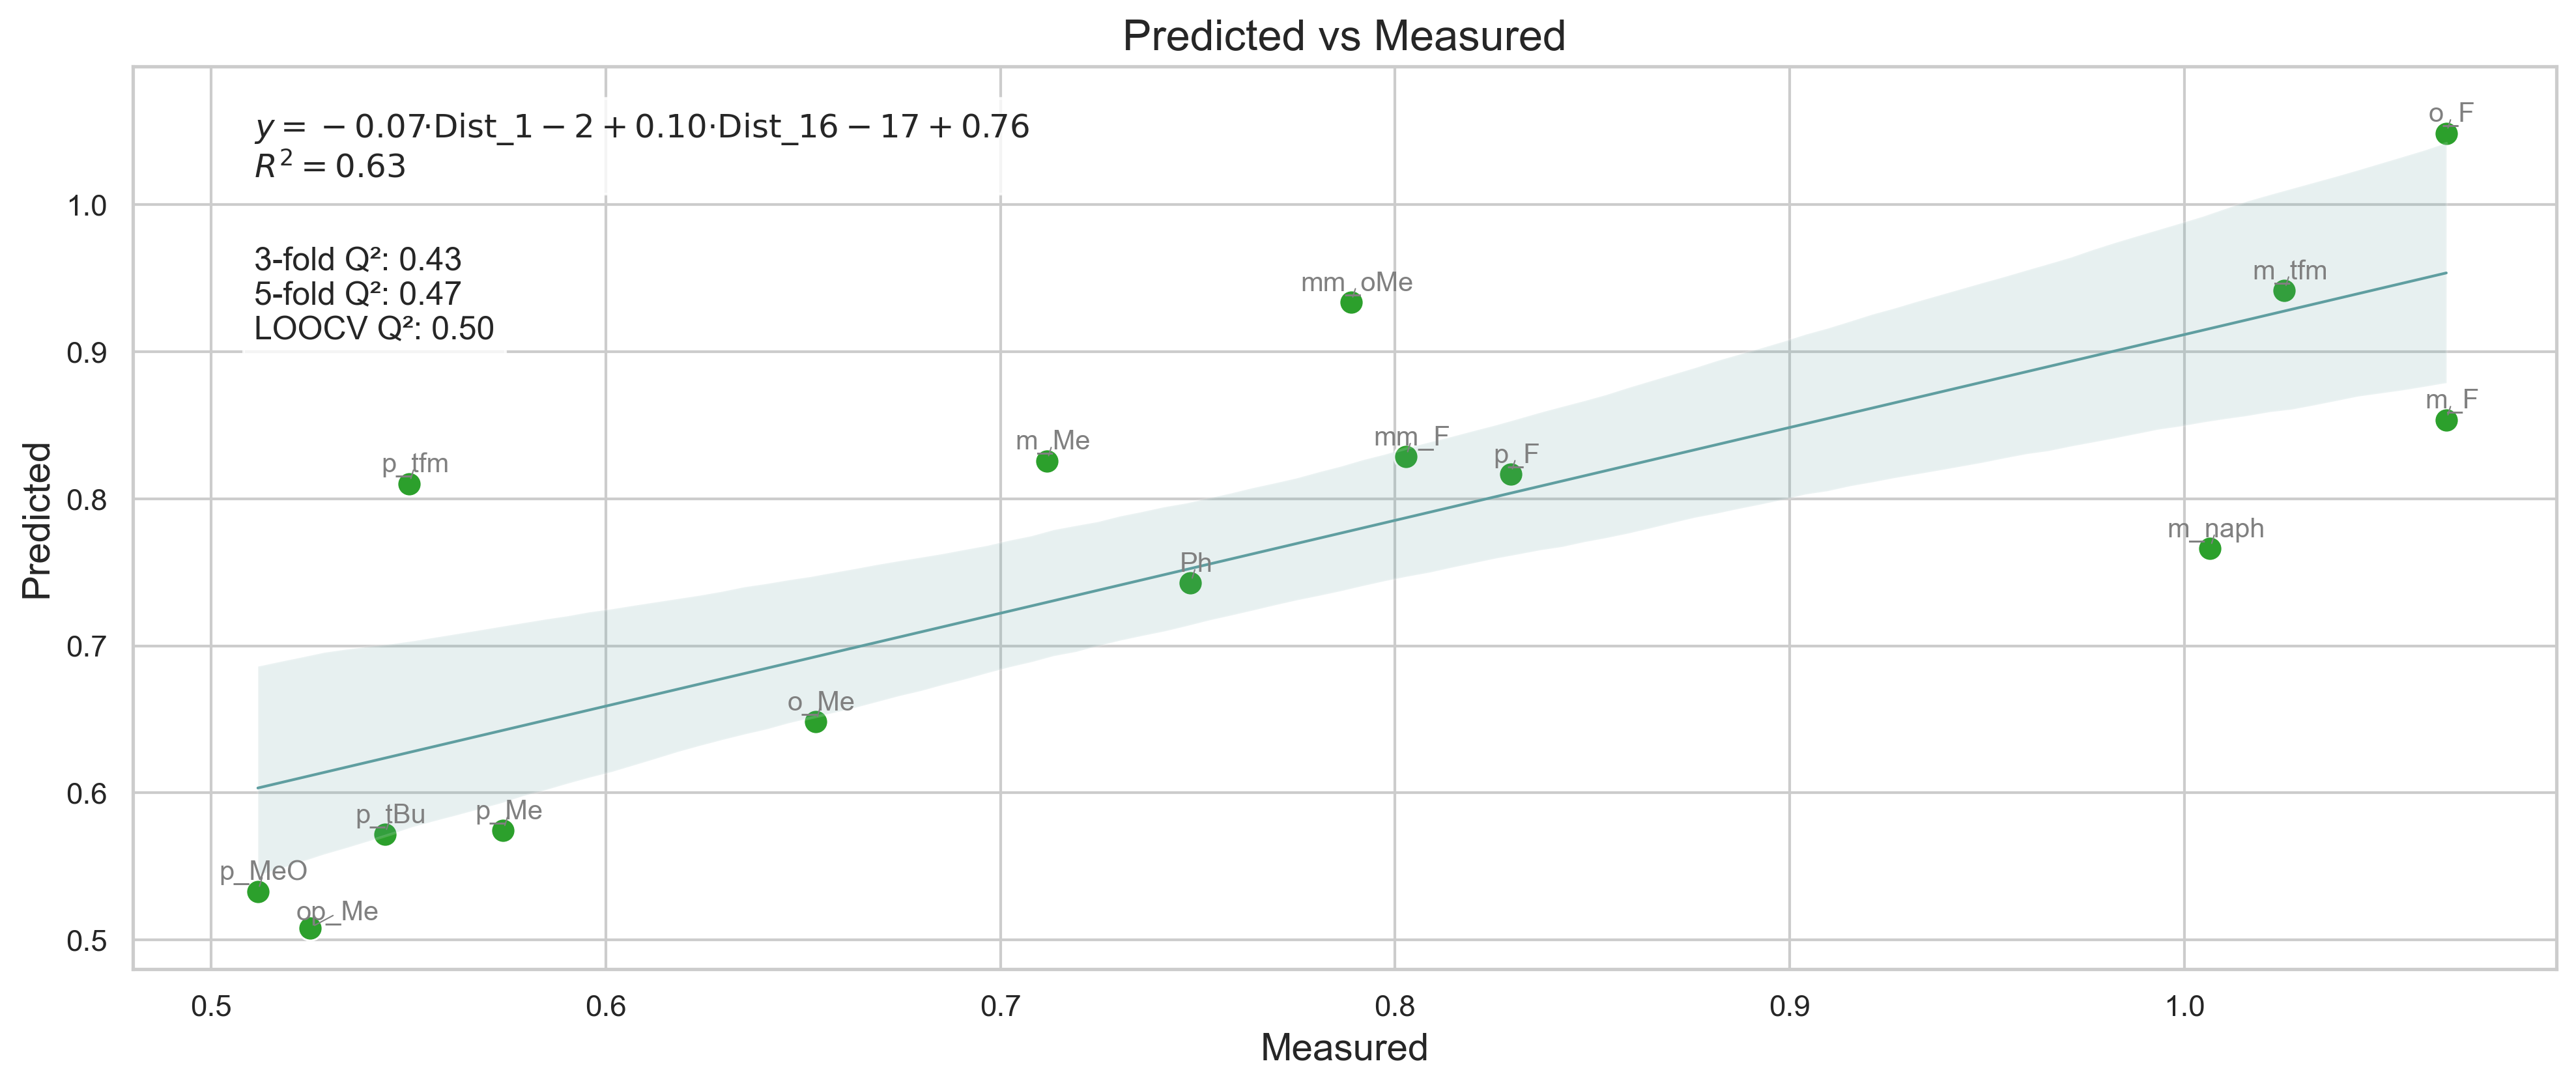

In [22]:
regression_model.search_models(top_n=5,threshold=0.9)

example use on a selected combination.

Extracting features from model.features_df...
Calculating cross-validation metrics for 3-fold CV...
Cross-validation metrics:
    Q2_3_Fold   MAE_3  RMSD_3  Q2_5_Fold   MAE_5  RMSD_5  Q2_LOOCV  MAE_LOOCV  \
0     0.3741  0.1309  0.1535     0.3259  0.1394  0.1612    0.3911     0.1348   

   RMSD_LOOCV  
0      0.1537  
Calculating fixed margin lines and axis bounds…
VIF DataFrame:
      variable       VIF
0        para  1.039006
1  Dist_16-17  1.039006
In-sample R^2: 0.6269 | MAE: 0.1050
Calling generate_q2_scatter_plot...


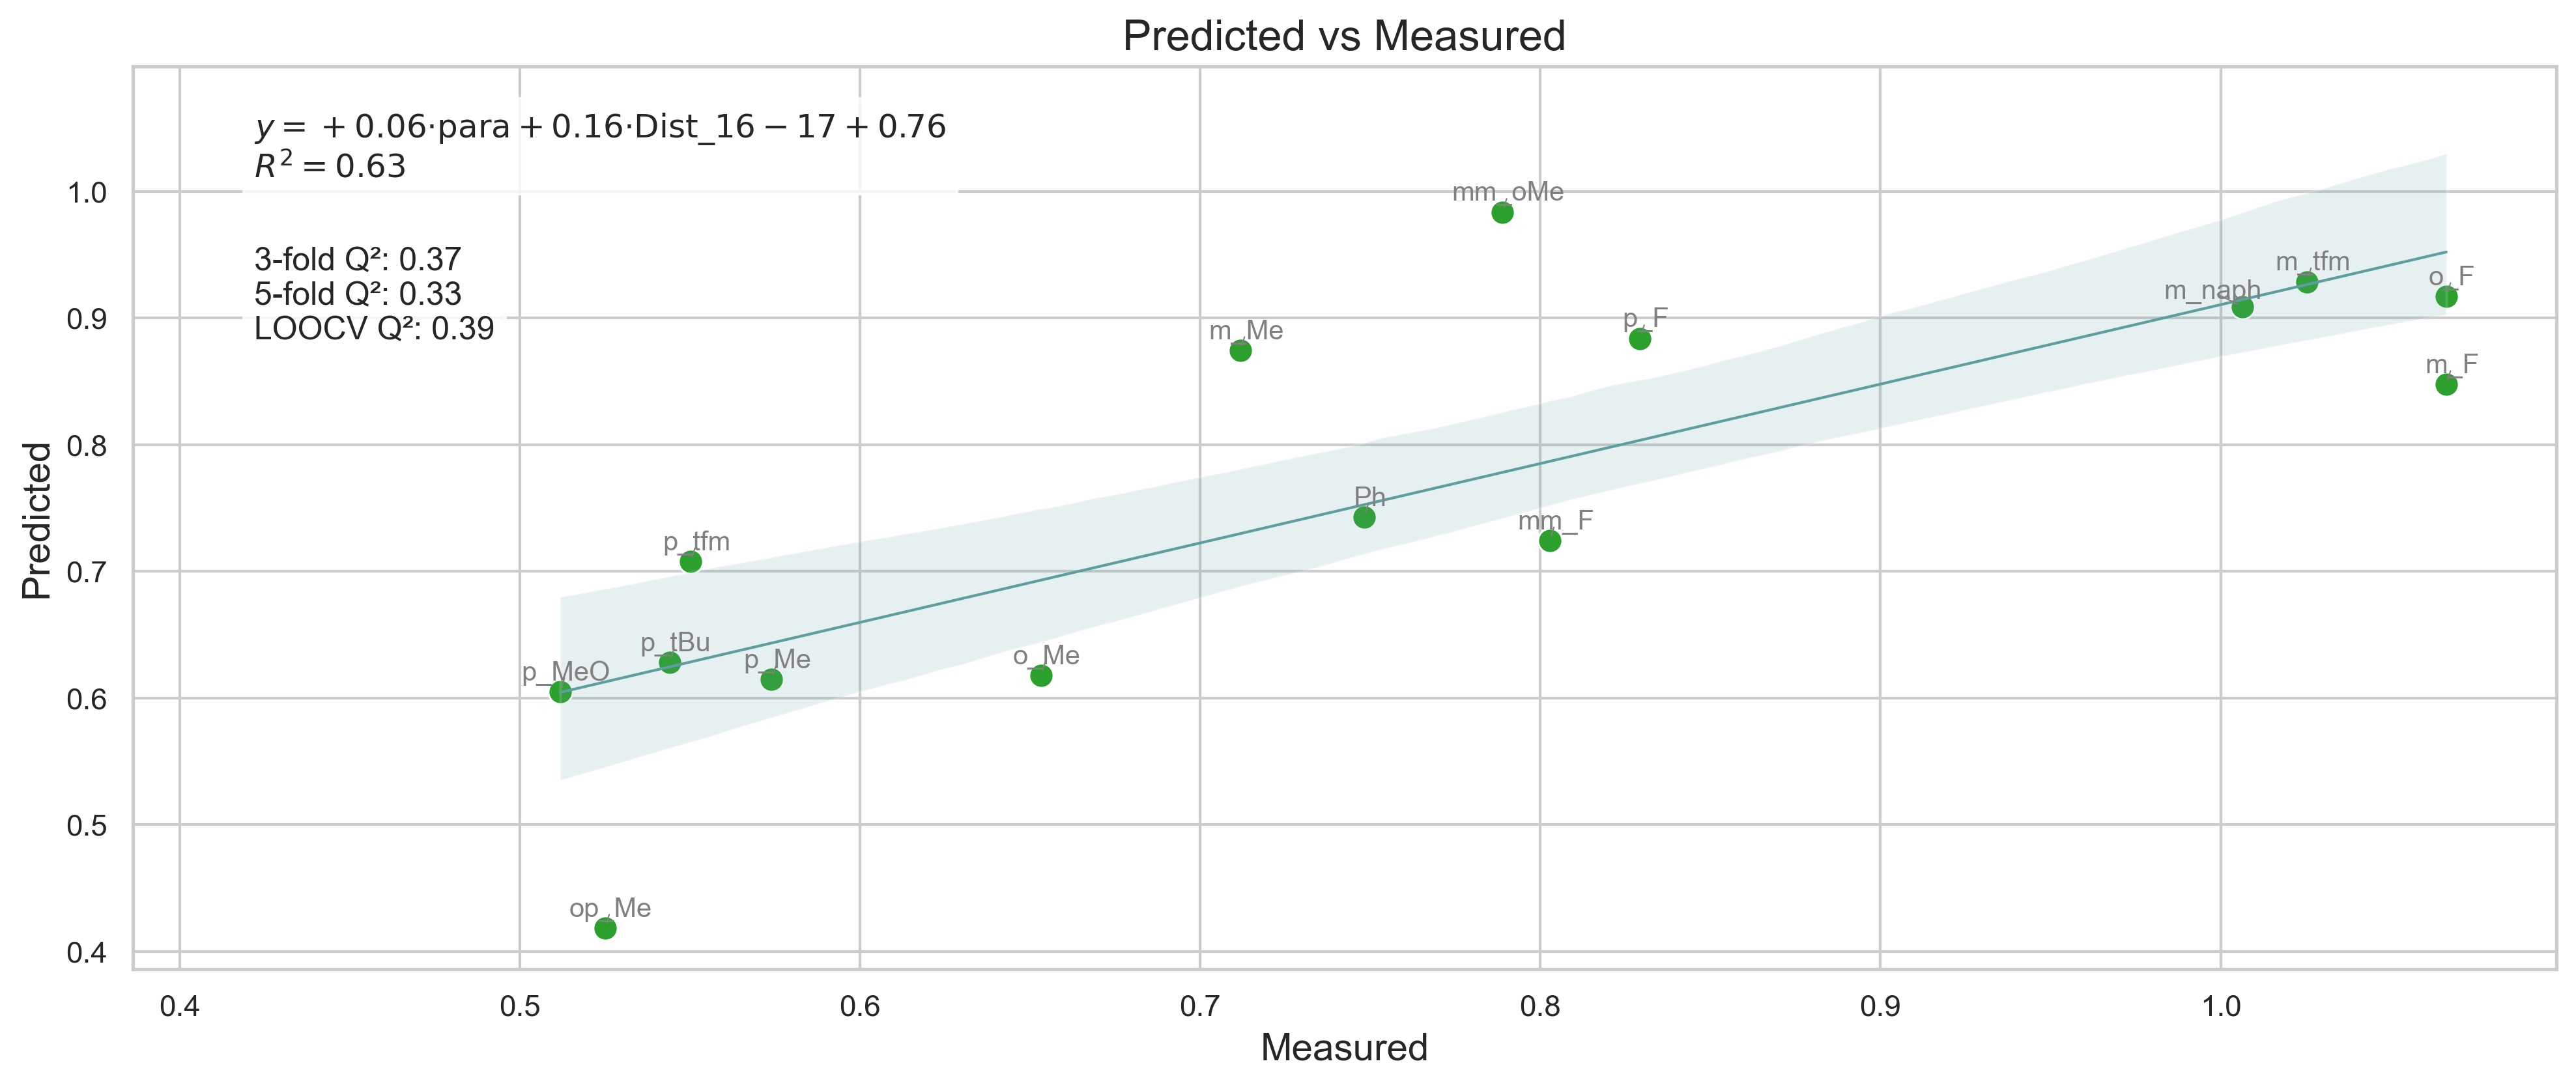

C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M3_modeler\plot.py:1732: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



[FIG] Saved MAE validation plot to: runs\Linear_Dataset_Example_output_linear_20250917\figs\Linear_Dataset_Example_sanity_checks_validation_MAE.png
[FIG] Saved RMSD validation plot to: runs\Linear_Dataset_Example_output_linear_20250917\figs\Linear_Dataset_Example_sanity_checks_validation_RMSD.png
[FIG] Saved per-feature MAE shuffle plot to: runs\Linear_Dataset_Example_output_linear_20250917\figs\Linear_Dataset_Example_sanity_checks_per_feature_shuffle_MAE.png
[FIG] Saved per-feature RMSD shuffle plot to: runs\Linear_Dataset_Example_output_linear_20250917\figs\Linear_Dataset_Example_sanity_checks_per_feature_shuffle_RMSD.png
Generating violin plots for selected features...


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\M3_modeler\plot.py:1964: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



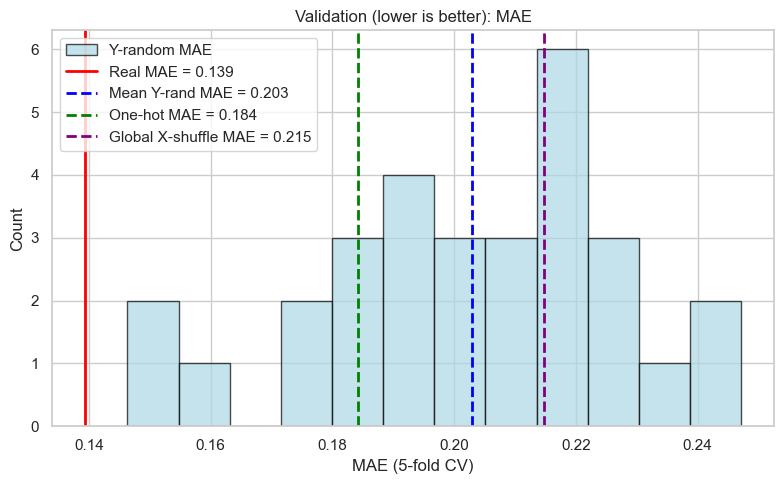

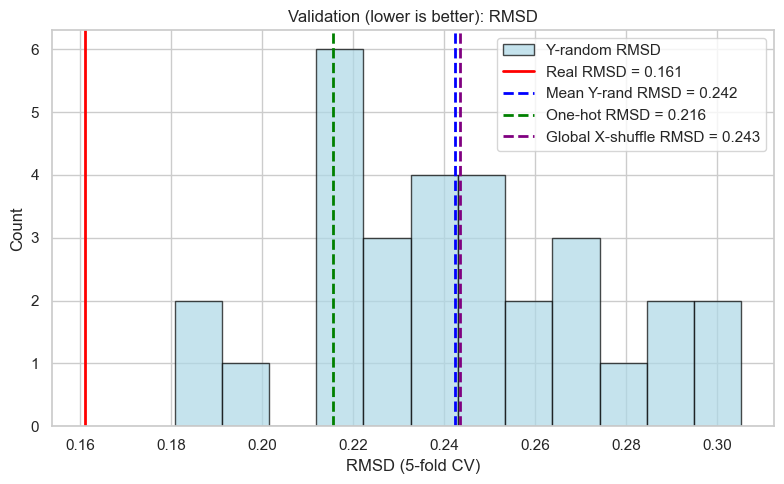

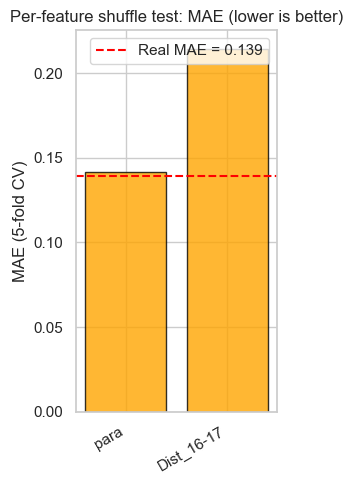

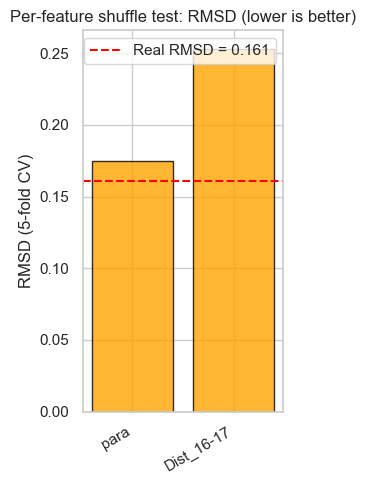

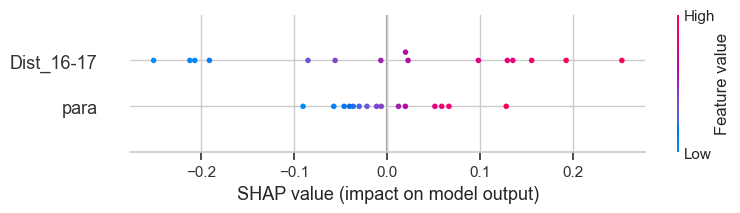

Using cutoff value = 0.549

Feature: para
Min=-1.64, Max=2.33, Unique=15
Class balance: [12  3]
Decision threshold on feature para: 0.65
Accuracy=0.80, F1=0.57, Recall=0.67
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.50      0.67      0.57         3

    accuracy                           0.80        15
   macro avg       0.70      0.75      0.72        15
weighted avg       0.83      0.80      0.81        15



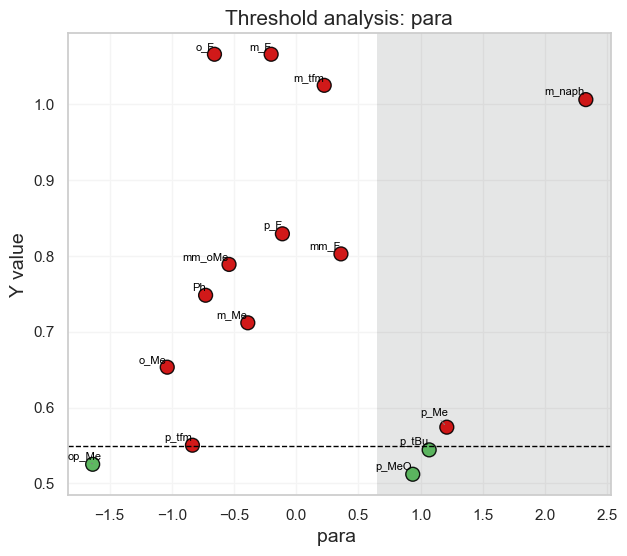


Feature: Dist_16-17
Min=-1.60, Max=1.61, Unique=15
Class balance: [12  3]
Decision threshold on feature Dist_16-17: -0.88
Accuracy=0.93, F1=0.86, Recall=1.00
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15



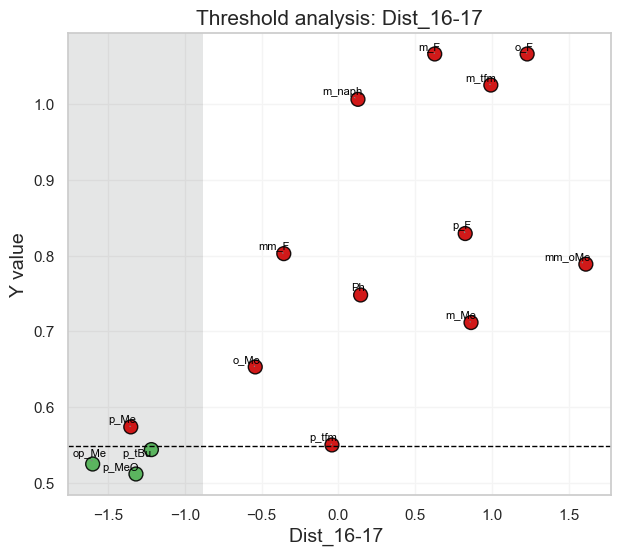

[PDF] Report saved: runs\Linear_Dataset_Example_output_linear_20250917\figs\report_para_Dist_16-17.pdf


In [23]:
features=['para', 'Dist_16-17']
plot.generate_and_display_single_combination_plot(regression_model, features)

In [24]:
modeling_example_dir = examples_path / 'modeling_example'
csv_path=modeling_example_dir / 'Logistic_Dataset_Example.csv'
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
classification_model= ClassificationModel(csv_filepaths, process_method='one csv', y_value='class',
                                        leave_out=None, min_features_num=2,
                                        max_features_num=4, metrics=None, return_coefficients=False)


Creating new run directory: runs\Logistic_Dataset_Example_class_cls_20250917
Database does not exist. It will be created at: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\runs\Logistic_Dataset_Example_class_cls_20250917\db\results_Logistic_Dataset_Example.db
Table 'classification_results' has been ensured to exist.
Loaded CSV: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\modeling_example\Logistic_Dataset_Example.csv
Names column: Unnamed: 0  |  Target column: class
Rows: 55
Features (total â kept numeric): 3 â 3

No features exceeded the correlation threshold.

Scaling only continuous (non-integer) columns: ['-2-3-', '-2-7-']
Leaving integer columns untouched: ['flag']


Using 1 jobs for evaluation. Found 20 cores.
Loaded 0 existing results from DB.
Combos to run: 4, already done: 0
Evaluating 4 new combos with McFadden RÂ² >= 0.500...


Threshold 0.500 (single-core):  50%|█████     | 2/4 [00:00<00:00, 12.50it/s]

[INFO] Evaluating combo: ('flag', '-2-3-')
[R2] Dropping duplicate columns: ['1_-2.463688204758451', '1_-1.527718375657408', '1_-1.5184001152287956', '1_-1.3486416032895638', '1_-1.3321400788962445', '1_-1.1116254441257873', '1_-1.110994410688199', '1_-1.048153997526868', '1_-1.0334719528786356', '1_-0.9605770736115059', '1_-0.9041732015137145', '1_-0.8714961866698271', '1_-0.737412098403111', '1_-0.7000444016730453', '1_-0.4807602821059164', '1_-0.4248086506384372', '1_-0.37673441991702195', '1_-0.3665958160195162', '1_-0.3631882354564771', '1_-0.35154566853270247', '1_-0.3409022378851213', '1_-0.3350967302591701', '1_-0.3270510539297158', '1_-0.14792169544208478', '1_0.10991856716260838', '1_0.11558735087706537', '1_0.1410074811885197', '1_0.3157827089566813', '1_0.38233570217591206', '1_0.42603476772994314', '1_0.4787470942177258', '1_0.48358501723935576', '1_0.6197725502980809', '1_0.6355273517902565', '1_0.6637029947792468', '1_0.718329456027757', '1_0.7266590974041093', '1_0.7863

Threshold 0.500 (single-core): 100%|██████████| 4/4 [00:00<00:00, 15.20it/s]


[R2] Dropping duplicate columns: ['1_-1.1153635071710337', '1_-1.0293247743865523', '1_-0.9873781524111834', '1_-0.9738970736529899', '1_-0.9661331824056996', '1_-0.8571577848230897', '1_-0.855855056351383', '1_-0.8391356786196632', '1_-0.7803585456780208', '1_-0.7563167226029399', '1_-0.7350377952202327', '1_-0.7073594457478174', '1_-0.6888928066061761', '1_-0.6666383763868247', '1_-0.631609798262424', '1_-0.6299242775383501', '1_-0.58046690112775', '1_-0.5744595323932652', '1_-0.5648557687072678', '1_-0.5494607286873083', '1_-0.5488217125886246', '1_-0.5474942878425788', '1_-0.5271599929535642', '1_-0.5232641556756138', '1_-0.49474921990974624', '1_-0.4733375500524458', '1_-0.4680803306511985', '1_-0.44473617732637766', '1_-0.41143942544041545', '1_-0.37497228933540133', '1_-0.3731015465537426', '1_-0.3385175013675427', '1_-0.3107928463807347', '1_-0.07488477273223541', '1_0.3882413730295345', '1_0.49880041920453466', '1_0.9410366039045214', '1_0.952134492188409', '1_1.01445245346430

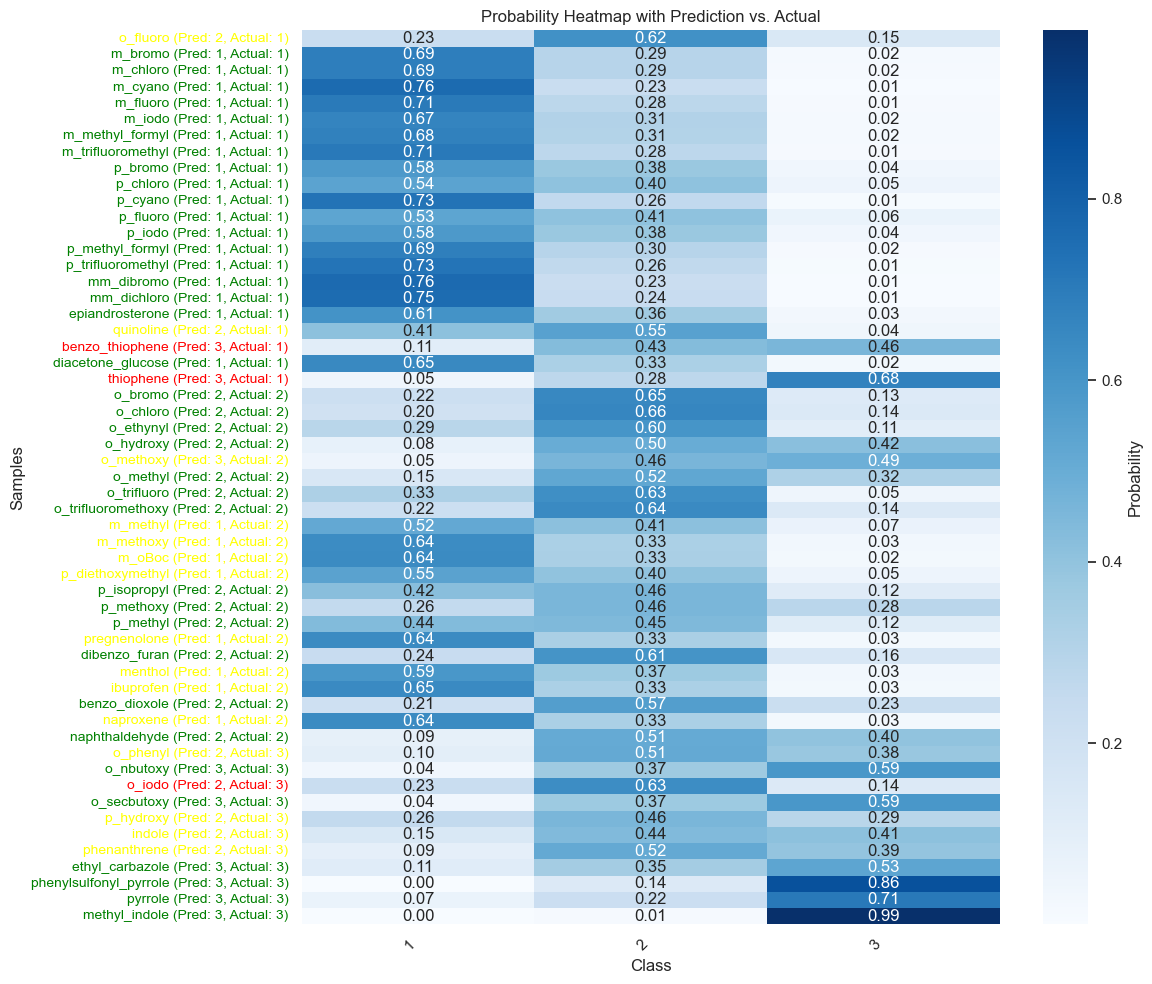





VIF Table

---

| variables   |     VIF |
|:------------|--------:|
| -2-3-       | 1.22626 |
| -2-7-       | 1.22626 |

Confusion Matrix

Results saved to classification_results.txt in C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples


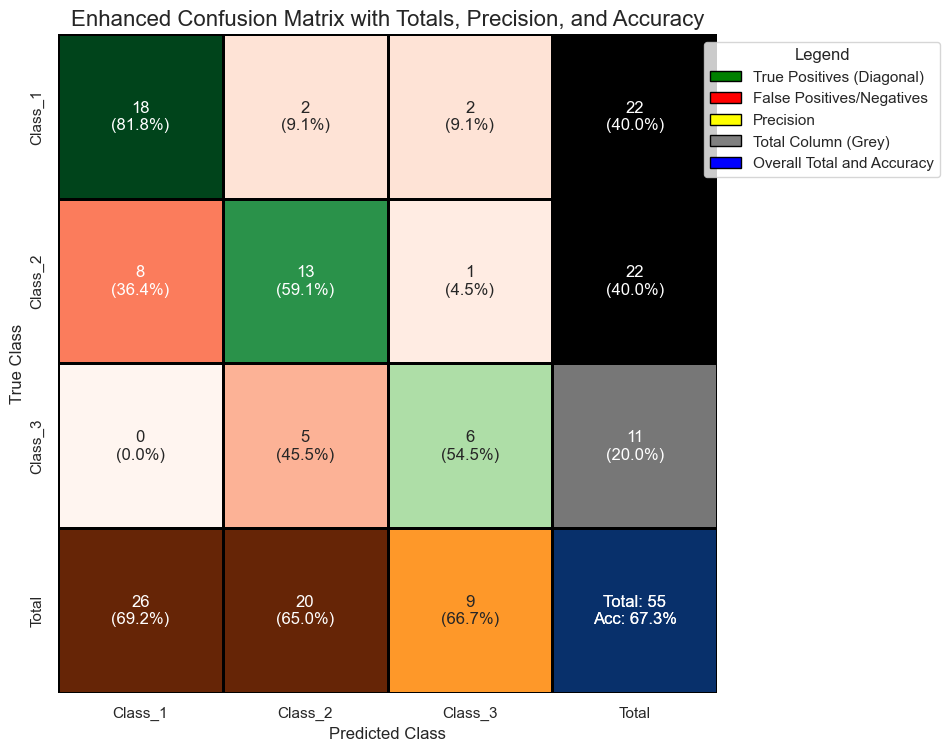

Exiting model selection.


,id,combination,accuracy,precision,recall,f1_score,mcfadden_r2,avg_mcfadden_r2,avg_accuracy,avg_f1_score,threshold,scores,model,predictions
0,NaN,"(-2-3-, -2-7-)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'accuracy': 0.6727272727272727, 'precision': ...",<modeling.ClassificationModel object at 0x0000...,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [26]:
classification_model.search_models(top_n=5,threshold=0.5)